In [184]:
from __future__ import print_function
from __future__ import division
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

# parameters

strip_width = 1# mm
max_iterations = 8000 # 10k
plot_progress = 0

# geometry

x_step = 0.1*strip_width # mm
z_step = x_step # mm
x_range = strip_width*4 #
z_range = 16 # mm
#x_range = 0.1
#z_range  = 0.1



In [185]:
x_values = np.linspace((-x_range), (x_range), int(2*x_range/x_step))
z_values = np.linspace(0,(z_range), int(2*z_range/z_step))

#x_range = 1
#z_range = 1
#x_values = np.linspace((-x_range), (x_range), 6)
#z_values = np.linspace((-z_range),(z_range), 6)

#detector_array = np.zeros((len(x_values),len(z_values)), dtype=np.float)
detector_array  = [[0 for x in range(len(x_values))] for z in range(len(z_values))] 
detector_array  = np.zeros((len(x_values),len(z_values)))
#print(detector_array)


In [186]:
# strip edges
high_edge = 0
low_edge = 0
high = []
low = []

#print(x_values)
#print(z_values)

for x_value in x_values:
    if float(x_value) >= float(strip_width/2):
        high.append(x_value)
    if float(x_value) <= float(-strip_width/2):
        low.append(x_value)

In [187]:
high_strip_edge = min(high)
low_strip_edge = max(low)
high_index = np.where(x_values == high_strip_edge)
low_index = np.where(x_values == low_strip_edge)
#x_values = []
#x_values = np.linspace((-x_range), (x_range), (4*x_range/x_step))
#high_index = x_values.index(high_strip_edge)
#low_index = x_values.index(low_strip_edge)
high_index = int(high_index[0][0])
low_index = int(low_index[0][0])
#low_index  = low_index + 1
print(high_index)
print(low_index)

45
34


In [188]:
# ?????????????????????????????????
max_x = len(x_values)
#min_x = min(x_values)
max_z = len(z_values)
#min_z = min(z_values)

# boundary conditions
old = 1
new = 0
##wp = [[[0 for z in range(2)] for x in range(max_x)] for z in range(max_z)]
#print(wp)
wp = np.zeros((2, len(x_values), len(z_values)))
#wp[:,:,:] =3
wp[0,max_x - 1 ,] = 0
wp[1,max_x - 1 ,] = 0
wp[1,0,] = 0
wp[0,0,] = 0

wp[0,low_index:(high_index+1),len(z_values) - 1] = 1 #high index +1 TODO
wp[1,low_index:(high_index+1),len(z_values) - 1] = 1
wp[0,:,0] = 0
wp[1,:,0] = 0

#wp[0:0, low_index:] = 0 
#wp[0:high_index, :] = 0
#wp[1:0, low_index:] = 0
#wp[1:high_index, :] = 0
print(wp)

[[[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]]


In [189]:
for x in range(1, (max_x - 1)):
    for z in range(1, (max_z - 1)):
        wp[0,x,z] = 1.0 * abs(z/max_z) * abs(x/max_x)
        
print(wp)

[[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
     0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   3.90625000e-05   7.81250000e-05 ...,   1.23828125e-02
     1.24218750e-02   0.00000000e+00]
  [  0.00000000e+00   7.81250000e-05   1.56250000e-04 ...,   2.47656250e-02
     2.48437500e-02   0.00000000e+00]
  ..., 
  [  0.00000000e+00   3.00781250e-03   6.01562500e-03 ...,   9.53476563e-01
     9.56484375e-01   0.00000000e+00]
  [  0.00000000e+00   3.04687500e-03   6.09375000e-03 ...,   9.65859375e-01
     9.68906250e-01   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
     0.00000000e+00   0.00000000e+00]]

 [[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
     0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
     0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
  

In [190]:
print("Calculating Weighting Potential via Relaxation....")
dif_store = np.zeros((max_iterations))

for iter in range(0,max_iterations):
    if (old == 0):
        old = 1
        new = 0
    else:
        old = 0
        new = 1
        
    sum_dif = 0
    max_dif = 0

    # reflection symm
    ## w(1,end,:) = w(1,end-1,:); ??

    # loop over internal points of detector grid
    for z in range(1, wp.shape[2] - 1): # X and Y ????
        #print (x)
        for x in range(1, wp.shape[1]-1):
            #print(y)
           
            # new value is average over neigbouring pixels
            wp[new,x,z] = (wp[old,x+1,z] + wp[old,x-1,z] + wp[old,x,z+1] + wp[old,x,z-1]) / 4
        
            # difference in solution between iterations
            dif = wp[old,x,z] - wp[new,x,z]
            if (dif < 0.0):
                dif = -dif
            sum_dif = sum_dif +  dif
            if (max_dif < dif):
                max_dif = dif

    # check for convergence
    if (max_dif < 1e-12):
        print("Solution may have converged...")
        continue
        #return
    
    # store difference vs. iteration
    dif_store[iter] = sum_dif
    
    # plot intermediate results
    if (plot_progress == 1):
        if ((iter%100) == 0):
            print(iter)
            print(sum_dif)
            plt.subplot(1,2,1)
            contour(np.squeeze(wp[old,:,:]),20)
            plt.subplot(1,2,2)
            contour(np.squeeze(wp[new,:,:]),20)

# get final result
WPout = np.squeeze(wp[0,:,0:max_z]); ##max_z bit

print("DONE")
print(WPout)

Calculating Weighting Potential via Relaxation....
DONE
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   3.30287628e-06   6.60575239e-06 ...,   5.20596608e-04
    2.61369659e-04   0.00000000e+00]
 [  0.00000000e+00   6.60053122e-06   1.32010621e-05 ...,   1.04539781e-03
    5.24864521e-04   0.00000000e+00]
 ..., 
 [  0.00000000e+00   6.60152418e-06   1.32030480e-05 ...,   1.04540381e-03
    5.24867519e-04   0.00000000e+00]
 [  0.00000000e+00   3.30337434e-06   6.60674850e-06 ...,   5.20599615e-04
    2.61371165e-04   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


In [203]:
#plo
print(len(x_values))
print(len(z_values))
print(WPout)

print((WPout.shape[0]))
print((WPout.shape[1]))

plt.cla() 
plt.clf() 

#plt.style.use('seaborn-white')

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.yaxis.tick_right()
#plt.contour(z_values,20)
###plt.contour(z_values, x_values, WPout, 50)


#plt.plot(z_values, WPout[0])
contours = plt.contour(z_values, x_values, WPout, 20, cmap='winter')
#plt.clabel(contours, inline=True, fontsize=8)

#CS = plt.contourf(X, Y, Z, 10, cmap=plt.cm.bone, origin=origin)

#plt.imshow(z_values, origin='lower', cmap='RdGy')
plt.colorbar();

ax.set_xlim(13,16)

plt.figure(figsize=(10, 5))
plt.semilogy(dif_store,'b.-')


80
320
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   3.30287628e-06   6.60575239e-06 ...,   5.20596608e-04
    2.61369659e-04   0.00000000e+00]
 [  0.00000000e+00   6.60053122e-06   1.32010621e-05 ...,   1.04539781e-03
    5.24864521e-04   0.00000000e+00]
 ..., 
 [  0.00000000e+00   6.60152418e-06   1.32030480e-05 ...,   1.04540381e-03
    5.24867519e-04   0.00000000e+00]
 [  0.00000000e+00   3.30337434e-06   6.60674850e-06 ...,   5.20599615e-04
    2.61371165e-04   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]
80
320


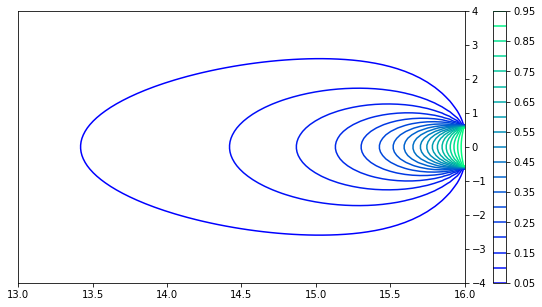

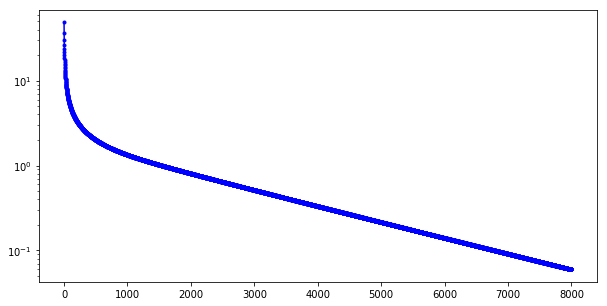

In [204]:
plt.show()